In [62]:
import pandas as pd
import ast
from matplotlib import pyplot as plt

In [55]:
df_wiki = pd.read_csv("../dat/wiki/graph.csv")
df_llm = pd.read_csv("../dat/llm/df_concepts.csv")
df_wiki.dep_articles = [[dep[1] for dep in ast.literal_eval(deps)] for deps in (df_wiki.dep_articles)]
df_llm.dep_articles = df_llm.dep_articles.apply(ast.literal_eval)

In [56]:
deps = pd.merge(df_wiki[['concept', 'dep_articles']], df_llm[['concept', 'dep_articles']], on="concept", suffixes=('_wiki', '_llm'))

In [59]:
def get_number_ofcommon_concepts(c):
    wiki_deps = set(c.dep_articles_wiki)
    llm_deps = set(c.dep_articles_llm)
    return len(wiki_deps.intersection(llm_deps))

deps['num_common'] = deps.apply(get_number_ofcommon_concepts, axis=1)

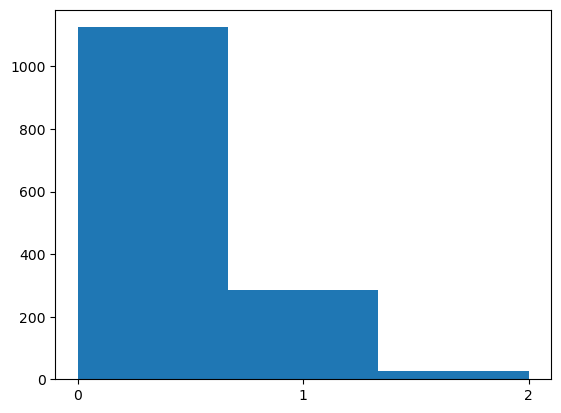

In [72]:
plt.hist(deps['num_common'],bins=3)
plt.xticks(range(3))
plt.show()